**STEP 1 - IMPORT REQUIRED LIBRARIES**

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

!conda install -c conda-forge folium=0.5.0 --yes
import folium
print('Folium installed and imported!')
from folium import plugins

Solving environment: done

## Package Plan ##

  environment location: /Users/nando/opt/anaconda3

  added / updated specs:
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.8.5                |   py37hc8dfbb8_1         3.0 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.0 MB

The following packages will be UPDATED:

  conda                                4.8.3-py37hc8dfbb8_1 --> 4.8.5-py37hc8dfbb8_1



conda-4.8.5          | 3.0 MB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done
Folium installed and imported!


**STEP 2 - LOAD FILES**

In [2]:
nyc_data_pre = pd.read_csv("nyc_data_pre.csv")

**STEP 3 - DATA PRE-PROCESSING**

In [3]:
df_heating = nyc_data_pre.loc[nyc_data_pre['Complaint Type'] == "HEATING"]
df_heating = df_heating.reset_index(drop=True)

**STEP 4 - DATA ANALYSIS**  
**Should the Department of Housing Preservation and Development of New York City focus on any particular set of boroughs, ZIP codes, or street (where the complaints are severe) for the specific type of complaints you identified in response to Question 1?**

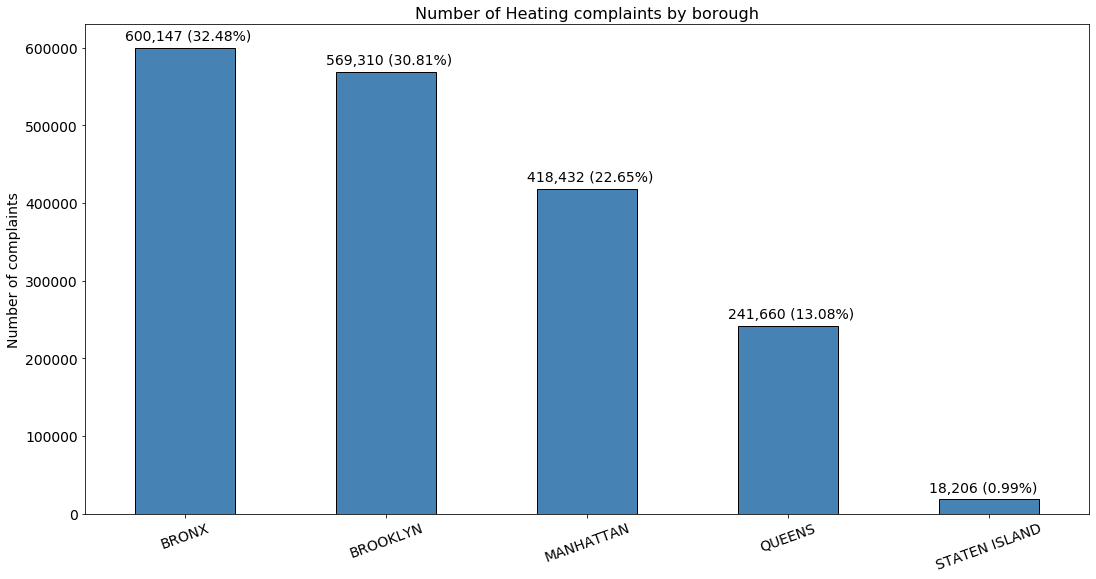

In [4]:
# Visualize the Heating complaints by Borough
df_heating["Borough"].value_counts().plot(kind="bar",
                                          figsize=(18,9),
                                          fontsize=14,
                                          color='steelblue',
                                          edgecolor="black")

plt.title("Number of Heating complaints by borough",fontsize=16)
plt.ylabel("Number of complaints",fontsize=14)
plt.xticks(rotation = 20)

# Annotate value labels to each country
for index, value in enumerate(df_heating["Borough"].value_counts()): 
 
    total = format(int(value), ',') # format int with commas
    percentage = np.round((value / sum(df_heating["Borough"].value_counts()))*100, 2)
    percentage = str(percentage)
    
    label = total + " " + "(" + percentage + "%)"
    
    # Place text at the end of bar (subtracting 0.1 from y to make it fit within the bar)
    plt.annotate(label, xy=(index-0.3,value+10000), color='black', fontsize=14)
    
plt.show()

**Now we will focus on the New York map, to see the different between the different zip codes areas, using the Folium library**

In [5]:
# Group data by zipcode
data_zipcode = pd.DataFrame(nyc_data_pre["Incident Zip"].value_counts())
data_zipcode["Total"] = data_zipcode.index
data_zipcode = data_zipcode.reset_index(drop=True)
data_zipcode.columns = ['Total', 'ZipCode']
data_zipcode["ZipCode"] = data_zipcode["ZipCode"].astype(int)

In [6]:
# Brooklyn latitude and longitude values
latitude = 40.73
longitude = -73.94

# Load json file of Brooklyn
ny_geo = r'nyc-zip-code-tabulation-areas-polygons.json' # geojson file

# Create a plain Brooklyn map
ny_map = folium.Map(location=[latitude, longitude], zoom_start=11)

# Create a numpy array of length 6 and has linear spacing from the minium total immigration to the maximum total immigration
threshold_scale = np.linspace(data_zipcode['Total'].min(),
                              data_zipcode['Total'].max(),
                              6, dtype=int)
threshold_scale = threshold_scale.tolist() # change the numpy array to a list
threshold_scale[-1] = threshold_scale[-1] + 1 # make sure that the last value of the list is greater than the maximum immigration

# Generate choropleth map using the total immigration of each country to Canada from 1980 to 2013
ny_map.choropleth(
    geo_data=ny_geo,
    data=data_zipcode,
    columns=['ZipCode', 'Total'],
    key_on='feature.properties.postalCode',
    threshold_scale=threshold_scale,
    fill_color='YlOrRd', 
    fill_opacity=0.9, 
    line_opacity=0.2,
    legend_name='Number of complaints',
    reset=True)

# Display Brooklyn map
ny_map

**Now we will focus on the zipcodes**

In [21]:
grouped_df = df_heating.groupby( ["Borough","Incident Zip"] )
df_zipcode = pd.DataFrame(grouped_df.size().reset_index(name = "Count"))

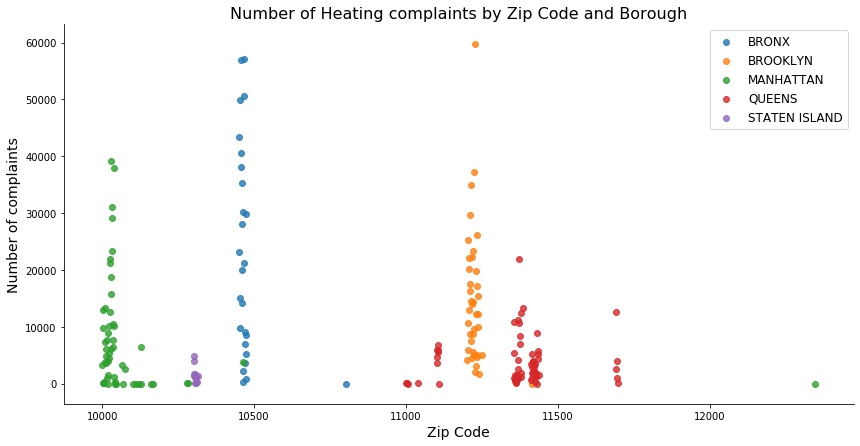

In [22]:
# Visualize the Heating complaints by Zip Code and Borough
sns.lmplot(x="Incident Zip", 
           y="Count", 
           data=df_zipcode, 
           fit_reg=False, 
           hue="Borough", 
           legend=False,
           height=6, 
           aspect=2)
 
plt.title("Number of Heating complaints by Zip Code and Borough",fontsize=16)
plt.xlabel("Zip Code",fontsize=14)
plt.ylabel("Number of complaints",fontsize=14)

plt.legend(loc='upper right',fontsize=12)

plt.show()

**STEP 5 - CONCLUSIONS**

I have analised the heating complaints ocurred during the last decade (2010-2020) in New York.  
**Bronx and Manhattan were the most impacted borouhgs with 32.48% and 30.81% respectively.**
